### Hypothesis Testing with Insurance Data (Core)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Do smokers have higher insurance charges than non-smokers?

In [4]:
# Filtering out those with and without super strength
smokes = df.loc[df['smoker']== 'yes'].copy()
non = df.loc[df['smoker']== 'no'].copy()

In [5]:
# Creating varibles for feature of interest
df_smoke = smokes['charges']
df_nope = non['charges']

## State your Null Hypothesis and Alternative Hypothesis

1. Null Hypothesis: There is no significant difference in charges for those who smoke and those who do not smoke...
2. Alternative Hypothesis: There is a vast difference in charges for those who smoke and those who do not smoke.

## Test selection and assumptions

1. Selection
 - Data is numeric
 - Two groups (smoke and no smoke)
 - Sample T-Test selected
 

2. Assumptions
  - No outliers of significance
 - Normality
 - Equal Variance

In [6]:
# check outliers for the smoke
zscores_smokes= stats.zscore(df_smoke)
outliers = abs(zscores_smokes)>3
np.sum(outliers)

0

In [7]:
# check outliers for the nope
zscores_nope= stats.zscore(df_nope)
nope_outliers = abs(zscores_nope)>3
np.sum(nope_outliers)

24

In [8]:
# remove outliers from nope group
df_nope = df_nope[(np.abs(stats.zscore(df_nope)) < 3)]

## Check for normality

In [9]:
# test the smokers group for normality
result_smoking_money = stats.normaltest(df_smoke)
result_smoking_money

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [10]:
# test the non-smokers group for normality
result_noping_money = stats.normaltest(df_nope)
result_noping_money

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

#### Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed.  However, our sample size is large enough to proceed without satisfying this test.  For an independent t-test, sample sizes of 15 per group are considered sufficient.

## Test for equal variance

In [11]:
# Test for equal variance
result = stats.levene(df_smoke, df_nope)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

#### Variance is not equal so I need to use the good ol' "equal_var=False" while breaking out that t-test

In [12]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(df_smoke, df_nope, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## Interpret p-value and reject or fail to reject  null hypothesis 

#### Yeah smokers are gonna have higher insurance and not likely to have equal insurance charges compared to the non-smokers. We can definitely see that in the p-value and I will reject the null hypothesis.

- Reject the null hypothesis
- Support the Alternate hypothesis because there is a huge difference in the charges for smokers an non-smokers in this data.

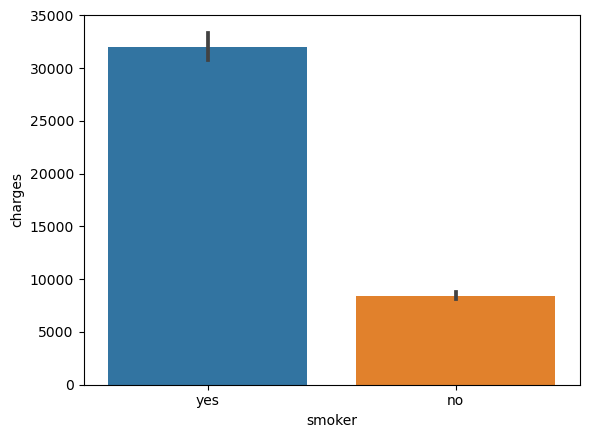

In [13]:
# Visualize what you can see
sns.barplot(data=df, x='smoker', y='charges');

#### The charges for smokers is significantly higher than charges for those who do not smoke.

# Are men more likely to smoke than women?

## State Null Hypothesis and Alternative Hypothesis

1. Null Hypothesis: Men and women smoking equally
2. Alternative hypothesis: There is a significant difference between the number of smokers in each gender.

## Test selection and assumptions

1. Selection
 - Data is categorical
 - Two groups (men and women)
 - Chi-squared test selected
 

2. Assumptions
 - There are two categorical variables (ordinal or nominal).
 - The outcomes are independent.

In [16]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['smoker'], df['sex'])
table

sex,female,male
smoker,,
no,547,517
yes,115,159


In [17]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [19]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

## Interpret p-value and reject or fail to reject  null hypothesis

- The p-value is below .05 so I can safely reject the null hypothesis.
- There is a difference between the number of smokers in each gender. Even though the difference isn't huge, the p-value points to support for the alternate hypothesis.

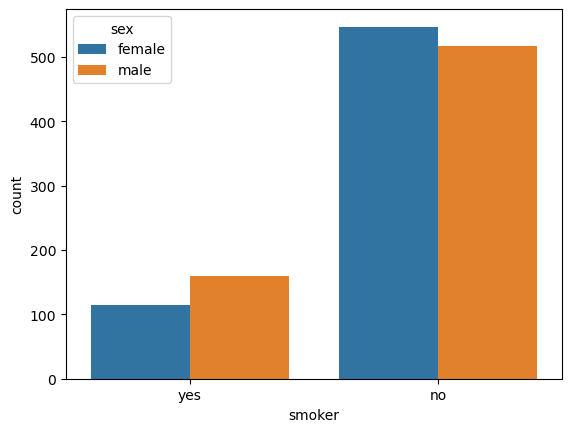

In [26]:
# Visual to show count for both smokers and non-smokers per gender
sns.countplot(data=df, x='smoker', hue='sex');

# Do different regions have different charges, on average?

## State Null Hypothesis and Alternative Hypothesis

1. Null Hypothesis: Charges will be equal no throughout differing regions
2. Alternative hypothesis: There is a significant difference between amount charged and by different regions

## Test selection and assumptions

1. Selection
 - Data is numeric
 - Multiple samples (regions)
 - ANOVA test selected
 

2. Assumptions
 - No significant outliers
 - Equal variance
 - Normality


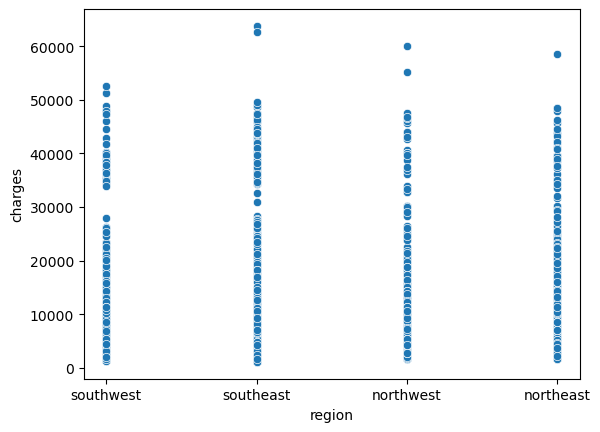

In [28]:
# Visualize data for significant outliers
sns.scatterplot(data=df, x='region',y='charges');

In [30]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [31]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [32]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [33]:
# Testing Assumption of Equal Variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

#### Normality met but unequal variance present. 

In [34]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [36]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


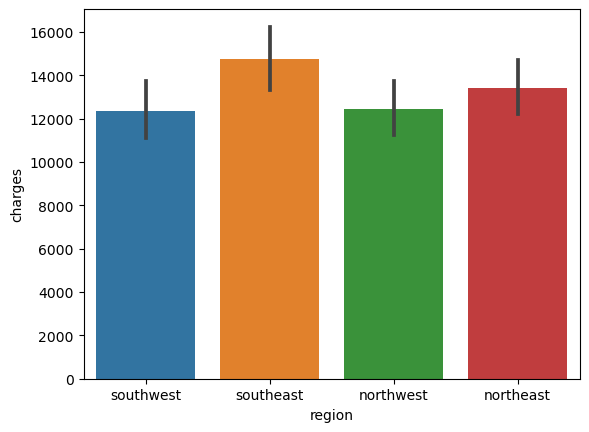

In [38]:
sns.barplot(data=df, x='region', y='charges');

## Interpret p-value and reject or fail to reject  null hypothesis

#### After running the ANOVA and Tukey's test provided from the learning platfrom, I can see the p-values are greater than .05 in every group but one. That group had a couple outliers that I did not remove and the value is very close to .05.

- I can safely fail to reject the null hypothesis based on the p-values alone. The barplot visual also gives a reasonable even distribution of charges across each region.
- There is not a significant difference in the charges for the differing regions in this data.